# Python Basecamp

### Karthikeyan Sankaran, 17th June, 2018

### End to End ML Pipeline [BigMart Sales]: Notebook 1 - Exploratory Data Analysis

In [36]:
import numpy as np
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set(style="whitegrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [37]:
DATA_FOLDER = '../datasets/'
train_explore      = pd.read_csv(os.path.join(DATA_FOLDER, 'BigMartSales-Training.csv'))
test_explore       = pd.read_csv(os.path.join(DATA_FOLDER, 'BigMartSales-Testing.csv'))

### Starting EDA

In [38]:
from utility_functions import *

In [39]:
unique_col_values(train_explore)

Item_Identifier | 1559 | object
Item_Weight | 416 | float64
Item_Fat_Content | 5 | object
Item_Visibility | 7880 | float64
Item_Type | 16 | object
Item_MRP | 5938 | float64
Outlet_Identifier | 10 | object
Outlet_Establishment_Year | 9 | int64
Outlet_Size | 4 | object
Outlet_Location_Type | 3 | object
Outlet_Type | 4 | object
Item_Outlet_Sales | 3493 | float64


** 0. Checking Train & Test distribution **

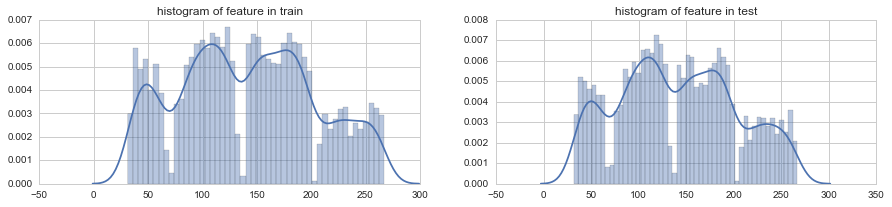

Skew-Train: 0.13
Skew-Test: 0.14


In [40]:
# Checking distribution of numerical variables in train & test
def examine_distribution(train, test):
    plt.figure(figsize=(15,10))
    gs = gridspec.GridSpec(3,2, width_ratios=(2,2))
    
    ax = plt.subplot(gs[0])
    sns.distplot(train, bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature in train')

    ax = plt.subplot(gs[1])
    sns.distplot(test, bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature in test')

    plt.show()


# Can set the variable for which the distribution is to be found
var = 'Item_MRP'

train_dist_df = train_explore[[var]].copy()
test_dist_df = test_explore[[var]].copy()

train_values = train_dist_df[var].values.reshape(-1,1)
test_values = test_dist_df[var].values.reshape(-1,1)

examine_distribution(train_values,test_values)
print("Skew-Train: %0.2f" %stats.skew(train_values))
print("Skew-Test: %0.2f" %stats.skew(test_values))

** 1. Exploring Numerical variables **

In [41]:
train_explore.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


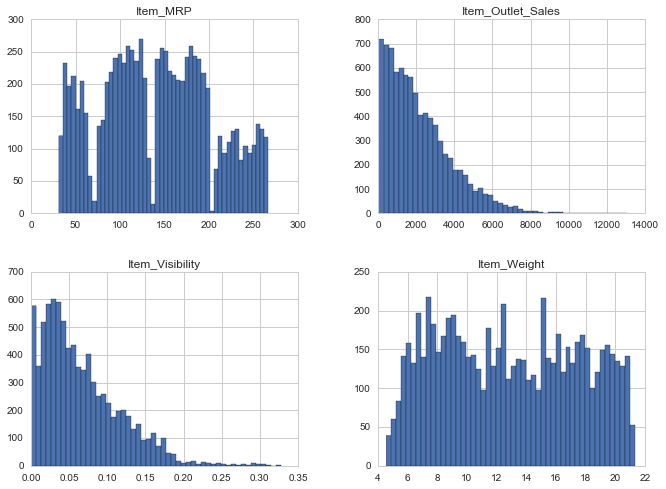

In [42]:
# Histograms
hist_columns = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
train_explore[hist_columns].hist(bins=50, figsize=(11,8))
plt.show()

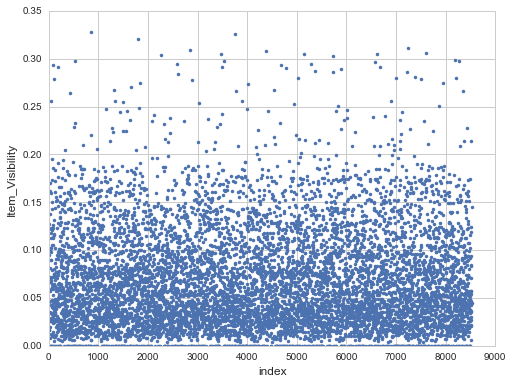

In [43]:
# Numerical values - Distribution
plt.figure(figsize=(8,6))
sort='No'
clipped='No'
#var = 'Item_Outlet_Sales'
#var = 'Item_MRP'
#var = 'Item_Weight'
var = 'Item_Visibility'

dist_df = train_explore[[var]].copy()

if clipped == 'Yes':
    llimit = np.nanpercentile(dist_df[var].values, 1)  #Here 1% is the threshold but that number can be changed
    ulimit = np.nanpercentile(dist_df[var].values, 99) #Here 99% is the threshold but that number can be changed
    dist_df.loc[dist_df[var] < llimit,[var]] = llimit
    dist_df.loc[dist_df[var] > ulimit,[var]] = ulimit
    
if sort=="Yes":
    plt.scatter(range(dist_df.shape[0]), np.sort(dist_df[var].values))
elif sort=="No":
    plt.plot(dist_df[var].values,'.')
    
plt.xlabel('index', fontsize=12)
plt.ylabel(var, fontsize=12)
plt.show()

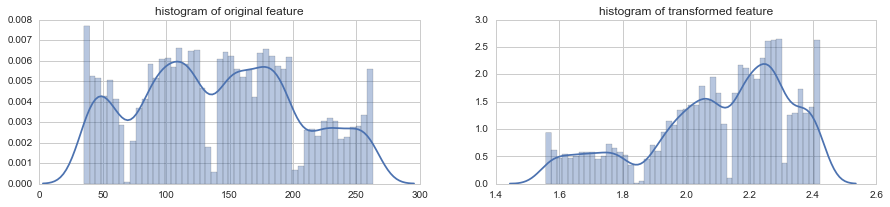

Skew-Before: 0.13
Skew-After: -0.72
Kurtosis-Before: -0.89
Kurtosis-After: -0.32


In [44]:
# Numerical - Checking Transformation of Variable
transform = 'log'
clipped='Yes'
#var = 'Item_Outlet_Sales'
var = 'Item_MRP'
#var = 'Item_Weight'
#var = 'Item_Visibility'

dist_df = train_explore[[var]].copy()

if clipped == 'Yes':
    llimit = np.nanpercentile(dist_df[var].values, 1)  #Here 1% is the threshold but that number can be changed
    ulimit = np.nanpercentile(dist_df[var].values, 99) #Here 99% is the threshold but that number can be changed
    dist_df.loc[dist_df[var] < llimit,[var]] = llimit
    dist_df.loc[dist_df[var] > ulimit,[var]] = ulimit

original_values = dist_df[var].values.reshape(-1,1)

if transform == 'boxcox':
    transformed_values,lam = stats.boxcox(original_values)
    print(lam)
elif transform == 'log':
    transformed_values = np.log10(original_values+1)
elif transform == 'sqrt':    
    transformed_values = np.sqrt(original_values)
elif transform == 'square':    
    transformed_values = np.power(original_values,2)
elif transform == 'cube':    
    transformed_values = np.power(original_values,3)
elif transform == 'scaler':
    transformed_values = MinMaxScaler(feature_range=(0, 1)).fit_transform(original_values)
elif transform == 'standardizer':
    transformed_values = StandardScaler().fit_transform(original_values)
elif transform == 'normalizer':
    transformed_values = Normalizer().fit_transform(original_values)
elif transform == "none":
    transformed_values = original_values
    
examine_transform(original_values,transformed_values)
print("Skew-Before: %0.2f" %stats.skew(original_values))
print("Skew-After: %0.2f" %stats.skew(transformed_values))

print("Kurtosis-Before: %0.2f" %stats.kurtosis(original_values))
print("Kurtosis-After: %0.2f" %stats.kurtosis(transformed_values))

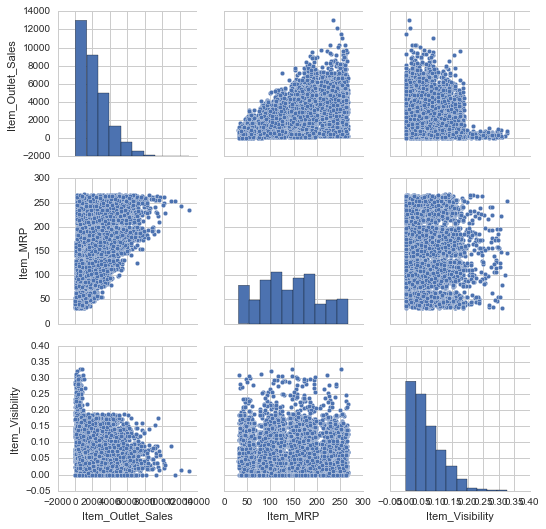

In [45]:
#Numerical - Pairplots
pairplot_columns = ['Item_Outlet_Sales','Item_MRP','Item_Visibility']
sns.pairplot(train_explore[pairplot_columns].dropna())
plt.show()

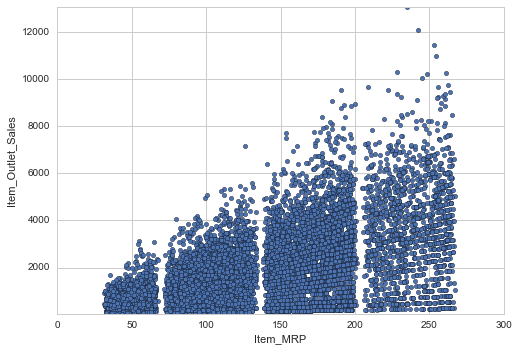

In [46]:
# Numerical - Drilling down to specific relationships
#xvar = 'Item_Visibility'
xvar = 'Item_MRP'
yvar = 'Item_Outlet_Sales'
type='scatter'

ymin = train_explore[yvar].min()
ymax = train_explore[yvar].max()

if type == 'lm':
    sns.lmplot(xvar, yvar, data=train_explore, fit_reg=True)
elif type == "joint":
    sns.jointplot(xvar, yvar, data=train_explore.dropna(), kind='scatter')
elif type == "scatter":
    pd.concat([train_explore[xvar], train_explore[yvar]], axis=1).plot.scatter(x=xvar, y=yvar, ylim=(ymin,ymax));

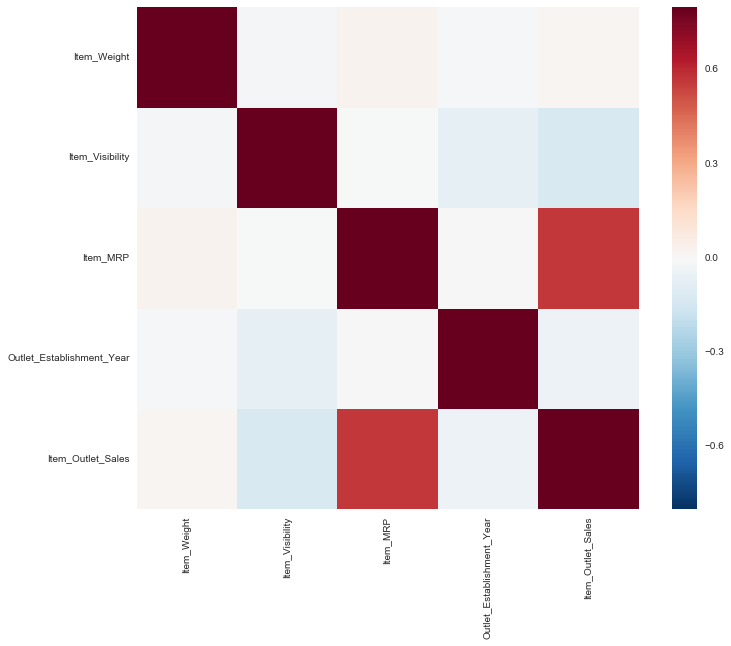

In [47]:
#correlation matrix - explorethe correlation among all numerical variables
corrmat = train_explore.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

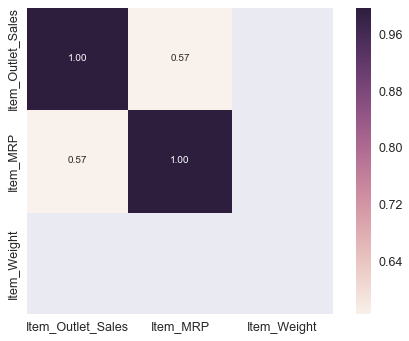

In [48]:
# Exploring correlations for specific numerical variable
k = 3 #number of variables for heatmap

focus_col = ['Item_Outlet_Sales']
cols = corrmat.nlargest(k, focus_col)[focus_col].index
cm = np.corrcoef(train_explore[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

** 2. Exploring Categorical Variables **

In [49]:
#Value Counts - Feel for number of records in each category

#Filter categorical variables
categorical_columns = [x for x in train_explore.dtypes.index if train_explore.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (train_explore[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Frequency of Categories for variable Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int6

C:\Users\Karthikeyan\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


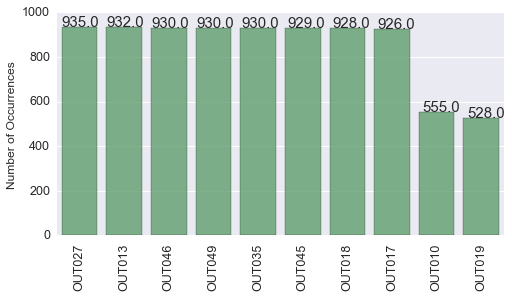

In [50]:
#Bar plots - Feel for number of records in each category

#var = 'Item_Type_Combined'
#var = 'Outlet_Type'
var = 'Outlet_Identifier'

# Method 1
#train_explore[var].value_counts(sort=False).plot.bar()

# Method 2
counts = np.round(train_explore[var].value_counts(normalize=False),2)
plt.figure(figsize=(8,4))
ax=sns.barplot(counts.index, counts.values, alpha=0.8, color=color[1])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.005))

plt.ylabel('Number of Occurrences', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#plt.xlabel(var, fontsize=12, vertical)
plt.show()

C:\Users\Karthikeyan\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


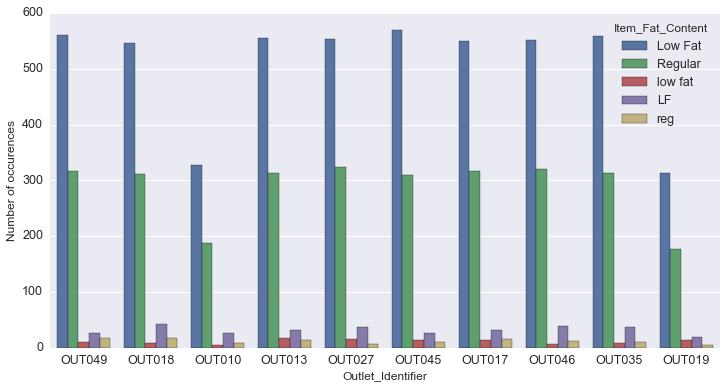

In [51]:
# Visualizing Relationship of categorical variables with hue as another categorical variable

xvar = 'Outlet_Identifier'
hue = 'Item_Fat_Content'

plt.figure(figsize=(12,6))
ax = sns.countplot(x=xvar,data=train_explore,hue=hue)

plt.xlabel(xvar, fontsize=12)
plt.ylabel('Number of occurences', fontsize=12)
plt.show()

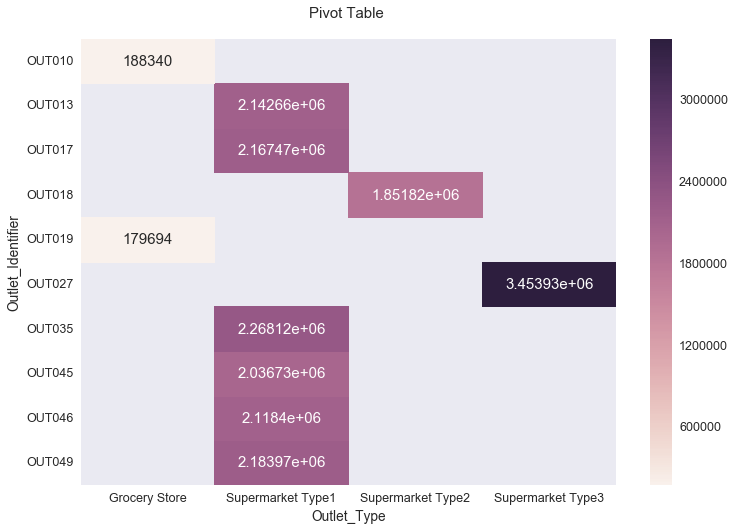

In [52]:
# Pivot Tables - To start understanding relationships between variables

plt.figure(figsize=(12,8))
xvar = ['Outlet_Identifier']
yvar = ['Outlet_Type']
calc_field = 'Item_Outlet_Sales'
calc_type = 'sum' #calc_type = ['count','mean','max','min','unique','sum']

effic_size_pivot = pivot_count(train_explore,xvar,yvar,calc_field,calc_type=calc_type)


sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel=xvar)
sns.plt.title('Pivot Table \n')

** 3. Categorical (X) vs Numerical (Y) **

C:\Users\Karthikeyan\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


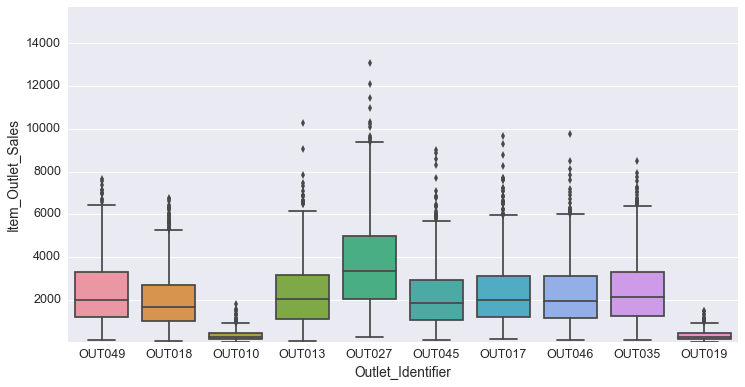

In [53]:
# Categorical (X) vs Numerical (Y) - Box plots - To understand the distribution in each category

xvar = 'Outlet_Identifier'
#xvar = 'Outlet_Type'

#yvar = 'Item_Weight'
yvar = 'Item_Outlet_Sales'

ymin = train_explore[yvar].min()
ymax = train_explore[yvar].max()

type = 'box' # Boxplot
#type = 'violin' #Violin
 
f, ax = plt.subplots(figsize=(12, 6))

if type == 'box':
    fig = sns.boxplot(x=xvar, y=yvar, data=train_explore)
elif type == 'violin':
    fig = sns.violinplot(x=xvar, y=yvar, data=train_explore)
    
fig.axis(ymin=0.8*ymin, ymax=1.2*ymax);

In [54]:
# Categorical with Numerical - Aggregate count to find average values of numerical variable grouped by category variable
def agg_avg(df, group_field, calc_field):
    grouped = df.groupby(group_field, as_index=False)[calc_field].mean()
    #grouped = grouped.sort(calc_field, ascending = False)
    grouped.columns = [group_field, 'Avg_' + str(calc_field)]
    return grouped

C:\Users\Karthikeyan\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


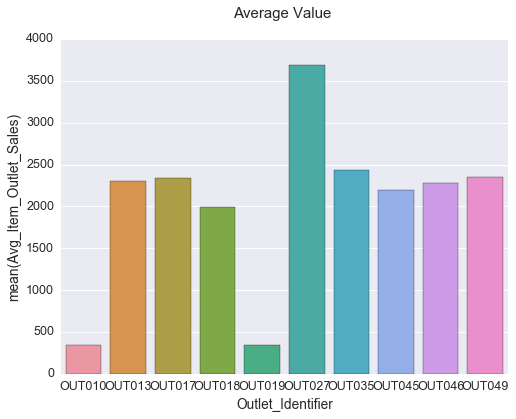

In [55]:
# Categorical with Numerical - Aggregate count to find average values of numerical variable grouped by category variable
plt.figure(figsize=(8,6))
group_var = 'Outlet_Identifier'
calc_var = 'Item_Outlet_Sales'

#loan_amount_avg = agg_avg(train_explore, 'Loan_Status', 'LoanAmount')
calc_var_avg = agg_avg(train_explore, group_var, calc_var)

yvar = 'Avg_' + calc_var
#ax = sns.barplot(data=loan_amount_avg, x='Loan_Status', y='Avg LoanAmount')
ax = sns.barplot(data=calc_var_avg, x=group_var, y=yvar)
ax.set(xlabel=group_var)
sns.plt.title('Average Value \n')